# Hill Climbing Algorithm

Fabrika, özel bir metal alaşım üretiyor. Bu alaşımın sertliği, fırının sıcaklığına göre değişiyor.

- Fırın çok soğuksa metal hamur gibi oluyor (yumuşak).

- Fırın çok sıcaksa metalin yapısı bozuluyor ve cam gibi kırılgan oluyor.

Amaç: Alaşımın sertliğini maksimum yapacak optimal sıcaklığın bulunması.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
temp = 100

In [3]:
neighbor_temp = 100

In [4]:
difference = 5

In [5]:
max_trial = 50

In [6]:
current_trial = 0

In [7]:
neighbor_score = 0

In [8]:
neighbor_temp_positive = temp + difference

In [9]:
neighbor_temp_negative = temp - difference

In [10]:
# Amaç fonksiyonu. Verilen sıcaklığa göre sertlik hesaplayan fonksiyon.

In [11]:
def calculateHardness(sicaklik):
    if sicaklik < 400: 
        return -1 * (sicaklik - 200)**2 + 5000
    else: 
        return -1 * (sicaklik - 700)**2 + 10000

In [12]:
score = calculateHardness(temp)

In [13]:
history_temp = []

In [14]:
history_score = []

In [15]:
while True:

    history_temp.append(temp)
    history_score.append(score)
    
    neighbor_temp_positive = temp + difference
    up_score = calculateHardness(neighbor_temp_positive)

    
    neighbor_temp_negative = temp - difference
    down_score = calculateHardness(neighbor_temp_negative)

    if(up_score > down_score):
        neighbor_temp = neighbor_temp_positive
    else:
        neighbor_temp = neighbor_temp_negative
    
    neighbor_score = calculateHardness(neighbor_temp)

    if(neighbor_score > score ):
        score = neighbor_score
        temp = neighbor_temp
    else:
        print(f"Zirveye Ulaşıldı! Sıcaklık: {temp}, Skor: {score}")
        break

Zirveye Ulaşıldı! Sıcaklık: 200, Skor: 5000


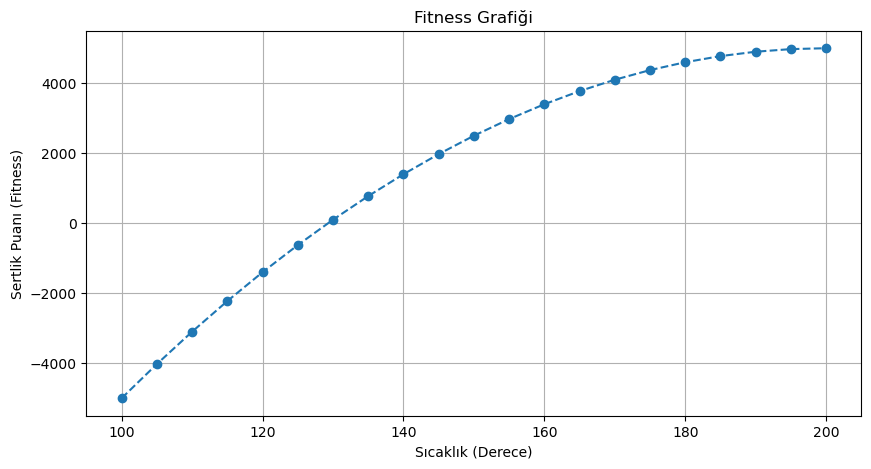

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(history_temp, history_score, marker='o', linestyle='--')
plt.title("Fitness Grafiği")
plt.xlabel("Sıcaklık (Derece)")
plt.ylabel("Sertlik Puanı (Fitness)")
plt.grid(True)
plt.show()

### Deney Sonucu

#### Gözlem:
Algoritma 100 dereceden başladı ve başarıyla tırmanışa geçti. Ancak 5.000 puanlık (200 Derece) tepeye ulaştığında durdu.
Asıl hedefimiz olan 10.000 puanlık 700 Derece sıcaklığa ulaşamadan local optimumda takıldı.

#### Sorun:
Hill Climbing algoritması sadece o anki konumundan daha iyi bir seçenek varsa hareket eder.
Formülümüze göre küçük tepenin zirvesindeyken (200 Derece), sağa veya sola atılacak her adım puanı düşürür. 
Algoritma "Daha kötüye gitmem" kuralına sahip olduğu için, arkadaki büyük dağı (Global Optimum) göremeden, bulunduğu küçük tepede (Local Optimum) sıkışıp kalır.

#### Çözüm:
Bu problemi aşmak için metalurjideki "Tavlama" işleminden esinlenen Simulated Annealing (Tavlama Benzetimi) algoritmasına geçiş yapılacaktır.